In [101]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data handling
import pandas as pd

# For cleaned dataset
from __init__ import PricingWizardDataset
from utils.DataTransformation import base_regression_pipeline

In [105]:
sns.set_theme()
sns.set_style("whitegrid")

# Raw dataset

In [7]:
raw_df = pd.read_csv("/Users/timbeckerhomefolder/Documents/GitHub/pricing_wizards/data/3month_sample_more_categories.csv")

In [8]:
len(raw_df)

338587

In [12]:
raw_df.head(2)

,classified_id,listed_at_date,product_id,user_id,classified_price,retail_price,listing_price,favourites,viewed_count,state,brand_name,condition_name,size_name,color_name,category_name,subcategory_name,subsubcategory_name,subsubsubcategory_name
0,30343099,2023-09-06,954766,2425635,900,3000.0,1299,10,145,10,Air Jordan,Almost as new,Size 41,Black,Men,Men,Men,Sneakers
1,30346312,2023-09-06,484749,144602,225,750.0,350,12,119,10,Ganni,Almost as new,Size 38,Multi,Women,Women,Clothes,Skirts


In [15]:
raw_df[["listing_price", "listing_price"]]

,classified_price,listing_price
0,900,1299
1,225,350
2,120,120
3,30,100
4,450,450
...,...,...
338582,95,190
338583,720,800
338584,270,270
338585,250,250


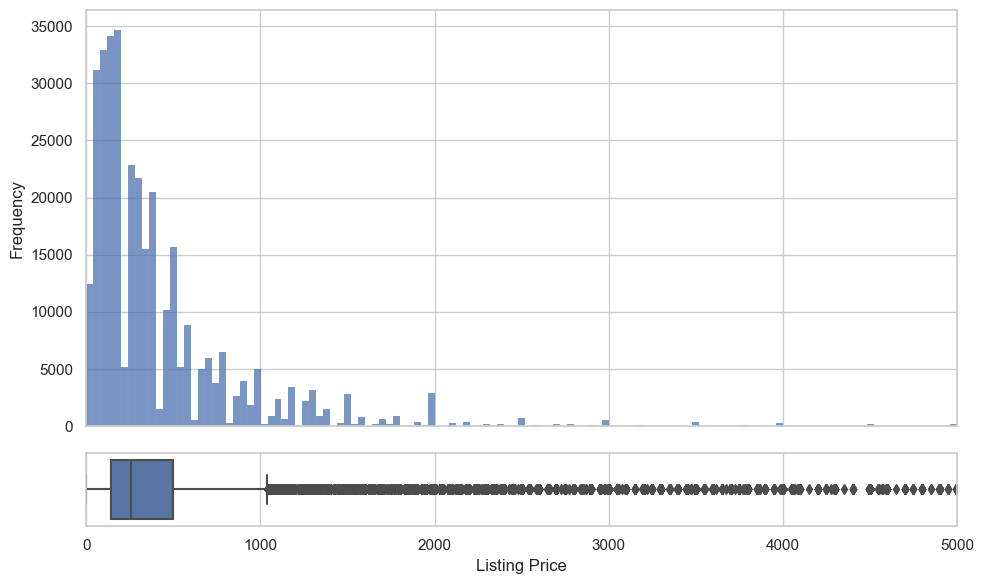

In [81]:
# Create a figure with two subplots (axes), one above the other
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True,
                                       gridspec_kw={"height_ratios": (.85, .15)}, 
                                       figsize=(10,6))

# Plotting the histogram on the first (top) axes
sns.histplot(data=raw_df, x='listing_price', ax=ax_hist, bins=2500, kde=False)

# Plotting the boxplot on the second (bottom) axes
sns.boxplot(data=raw_df, x='listing_price', ax=ax_box)

# Remove the x-axis labels for the histogram (since they're shared with the boxplot)
ax_hist.set(xlabel='')

# Set labels and titles
ax_box.set_xlabel('Listing Price')
ax_hist.set_ylabel('Frequency')

# Set the x-axis limit for both plots to 5000
ax_hist.set_xlim(0, 5000)
ax_box.set_xlim(0, 5000)

# Display the plot
plt.tight_layout()
plt.show()

In [54]:
raw_df.category_name.unique()

array(['Men', 'Women', 'Kids', 'Sport', 'Home', 'Electronics'],
      dtype=object)

In [55]:
raw_df.subsubcategory_name.unique()

array(['Men', 'Clothes', 'Women', 'Til piger', 'Skin care', 'Til drenge',
       'Sportswear', 'Accessories', 'Home', 'Sport', 'Beauty & care',
       'Makeup', 'Fragrances', 'Kids', 'Electronics',
       'Smartphones & Accessories', 'Sports shoes', 'Furniture', 'Toys',
       'Sportsudstyr'], dtype=object)

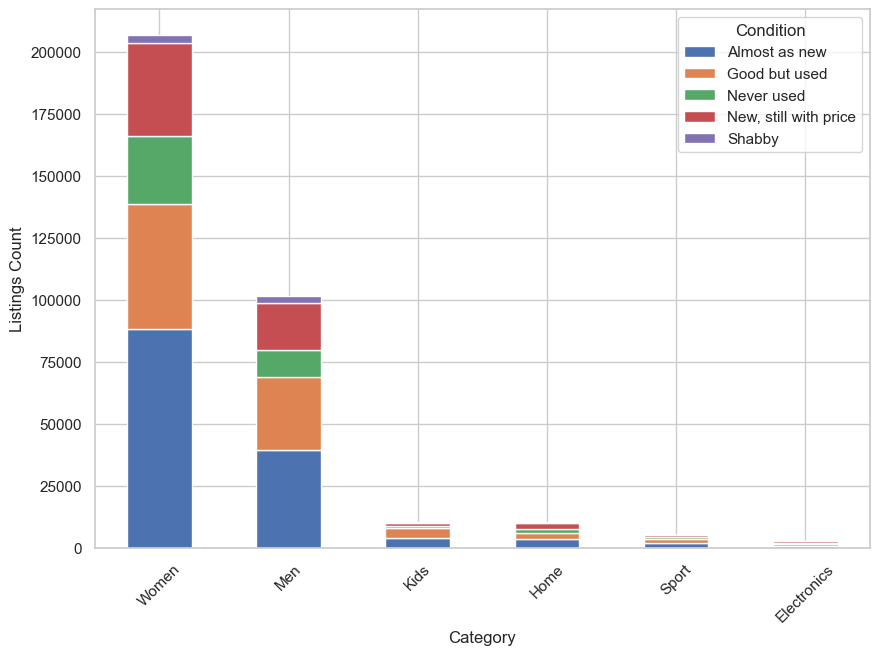

In [97]:
# Now we will count listings based on 'category_name' and 'condition_name'
category_condition_counts = raw_df.groupby(['category_name', 'condition_name']).size().unstack(fill_value=0)

# Sort categories by total number of listings from high to low
category_totals = category_condition_counts.sum(axis=1)
sorted_categories = category_condition_counts.reindex(category_totals.sort_values(ascending=False).index)

# Plot the sorted stacked bar chart
sorted_categories.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate category names for better visibility
plt.legend(title='Condition', loc='upper right')  # Place the legend floating over the plot

# Show the plot
plt.show()

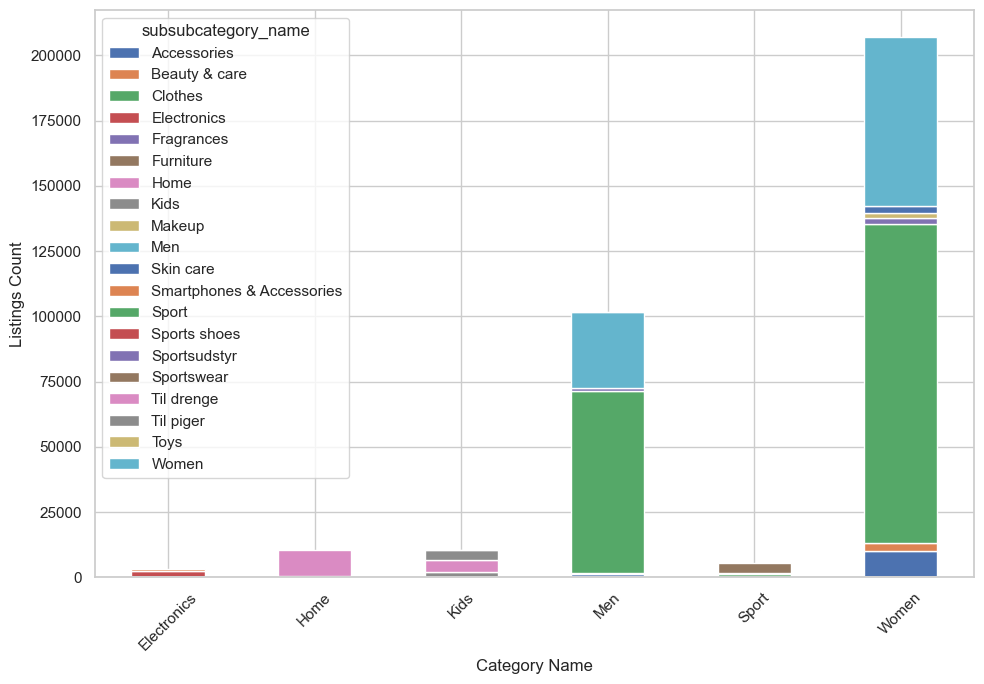

In [78]:
# Now we will count listings based on 'category_name' and 'subcategory_name'
category_subcategory_counts = raw_df.groupby(['category_name', 'subsubcategory_name']).size().unstack(fill_value=0)

# Plot the stacked bar chart
category_subcategory_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Category Name')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate category names for better visibility
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()

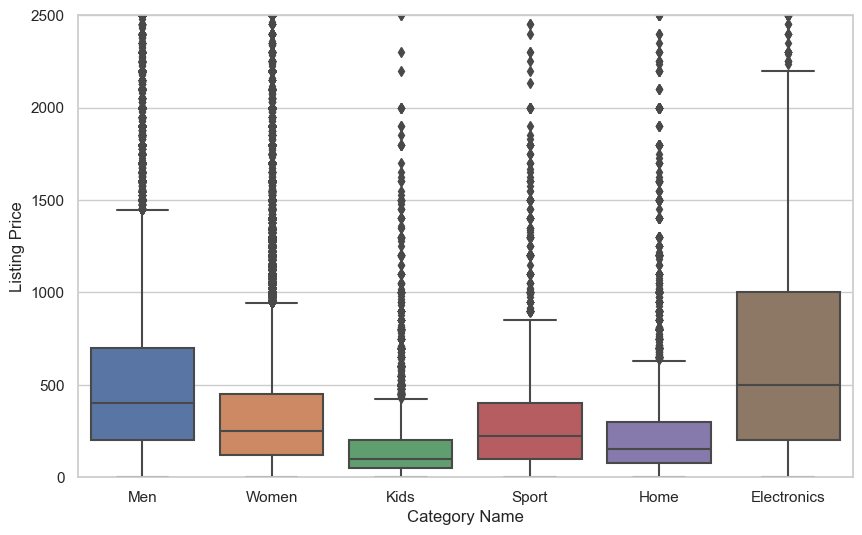

In [80]:
# Now we'll create boxplots for 'listing_price' by 'category_name'
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_df, x='category_name', y='listing_price')

# Set labels and title
plt.xlabel('Category Name')
plt.ylabel('Listing Price')
plt.ylim(0, 2500)

# Show the plot
plt.show()

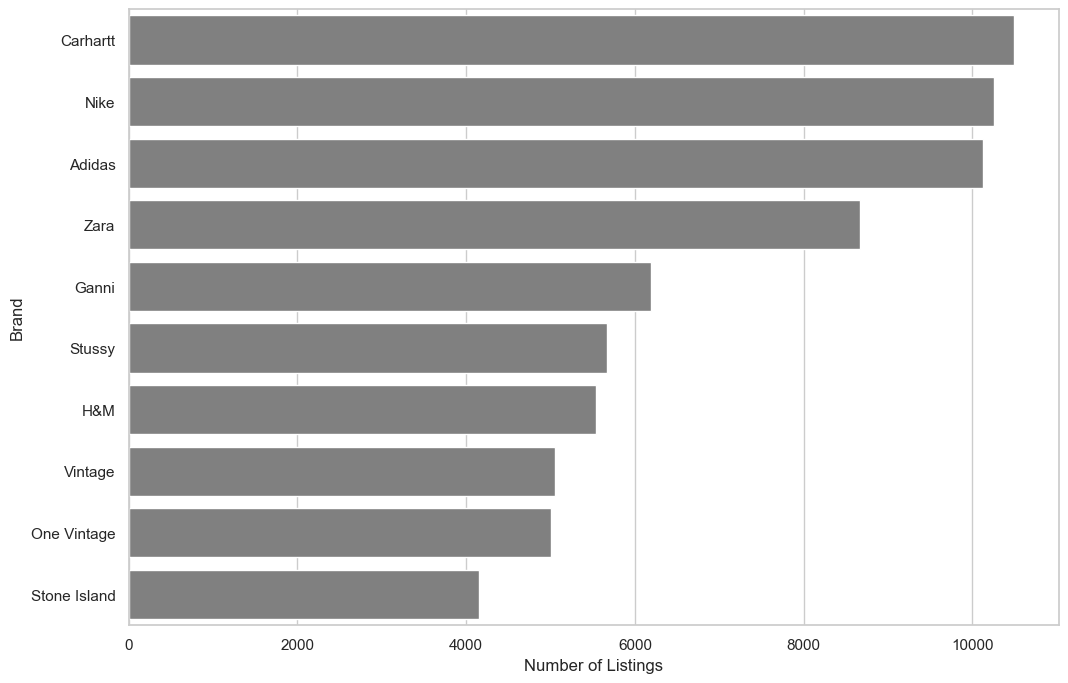

In [76]:
# Now let's find the top 10 brands by number of listings
top_brands = raw_df.groupby('brand_name').size().sort_values(ascending=False).head(10)

# Reset index to get brand names into a column for plotting
top_brands = top_brands.reset_index(name='listings')

# Plot the top 10 brands by number of listings
plt.figure(figsize=(12, 8))
sns.barplot(data=top_brands, x='listings', y='brand_name', color="grey")
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.show()

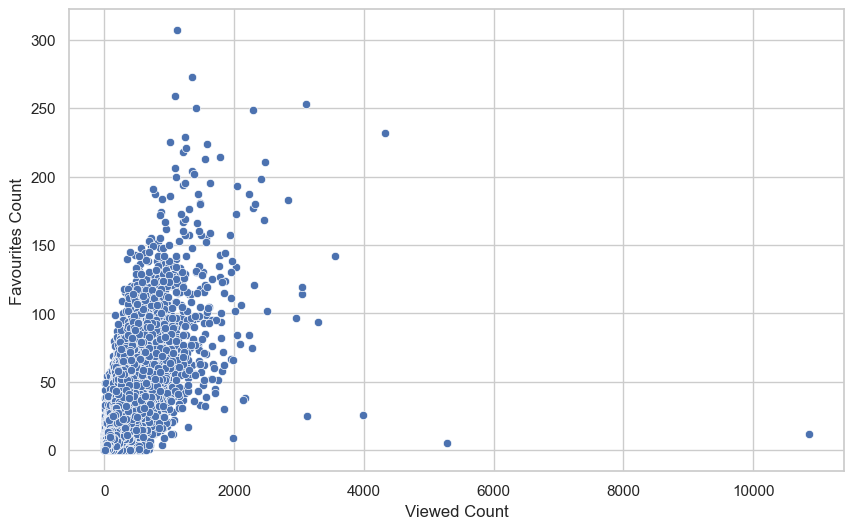

In [98]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='viewed_count', y='favourites')

# Set labels and title
plt.xlabel('Viewed Count')
plt.ylabel('Favourites Count')

# Show the plot
plt.show()

# Preprocessed dataset

In [ ]:
# scatter condition and listing price
# corr heatmap with price, cond, brand, favourites, viewed_count

In [102]:
# Data loading
data = PricingWizardDataset(
    filename = 'post_preprocessing_without_dummies.csv'
)

Dataset Loaded: post_preprocessing_without_dummies
	Number of Rows: 283055
	Number of Columns: 22
	Outlier Removal: True
	Train Size: 0.8
	Test Size: 0.2
	Random State: 42


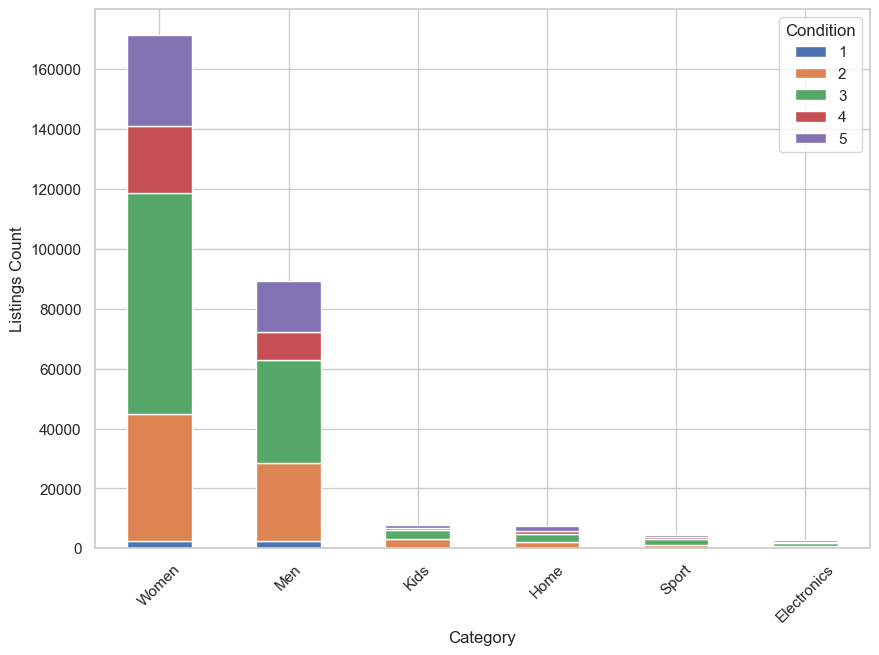

In [100]:
# Now we will count listings based on 'category_name' and 'condition_name'
category_condition_counts = data.df.groupby(['category_name', 'condition_name']).size().unstack(fill_value=0)

# Sort categories by total number of listings from high to low
category_totals = category_condition_counts.sum(axis=1)
sorted_categories = category_condition_counts.reindex(category_totals.sort_values(ascending=False).index)

# Plot the sorted stacked bar chart
sorted_categories.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate category names for better visibility
plt.legend(title='Condition', loc='upper right')  # Place the legend floating over the plot

# Show the plot
plt.show()

In [103]:
len(data.df)

283055

In [82]:
data.df.columns

Index(['classified_id', 'listed_at_date', 'user_id', 'classified_price',
       'listing_price', 'favourites', 'viewed_count', 'brand_name',
       'condition_name', 'color_name', 'category_name', 'subcategory_name',
       'subsubcategory_name', 'subsubsubcategory_name',
       'classified_price_standardized', 'viewed_count_standardized',
       'favourites_standardized', 'classified_price_normalized',
       'viewed_count_normalized', 'favourites_normalized', 'log_listing_price',
       'log_viewed_count'],
      dtype='object')

In [87]:
cleaned_df = base_regression_pipeline(data.df)

In [88]:
len(cleaned_df)

283055

In [89]:
cleaned_df.columns

Index(['classified_id', 'log_listing_price', 'brand_name', 'condition_name',
       'subsubsubcategory_name'],
      dtype='object')

In [93]:
cleaned_df.brand_name.unique()[:5]

array([6.88037128, 6.10827227, 5.16130586, 5.70505477, 5.87142215])

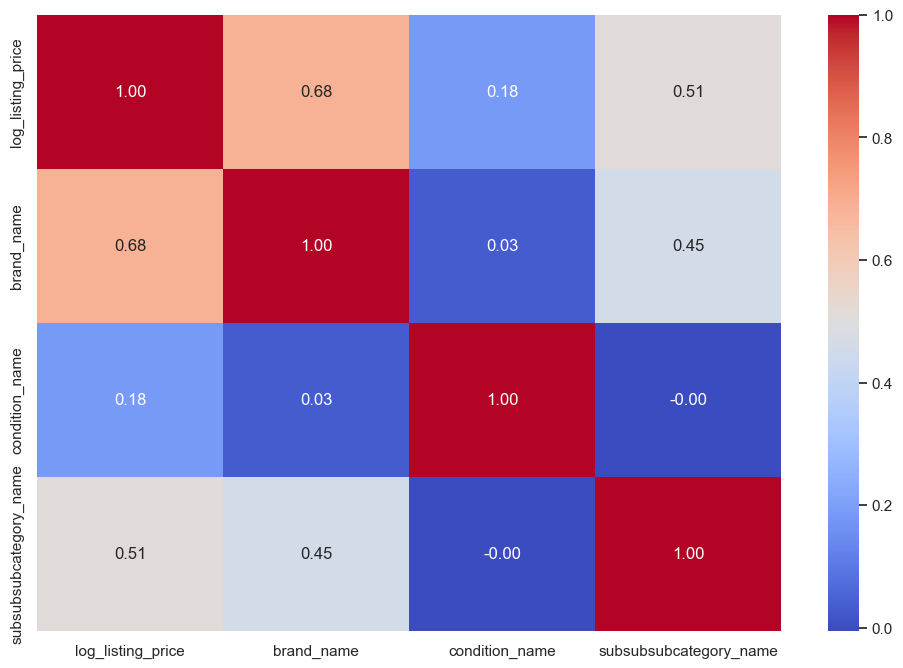

In [99]:
df_subset = cleaned_df[['log_listing_price', 'brand_name', 'condition_name',
       'subsubsubcategory_name']]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()